In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Datasets/appliance_energy.csv")

df

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [3]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
df.isnull().sum()


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

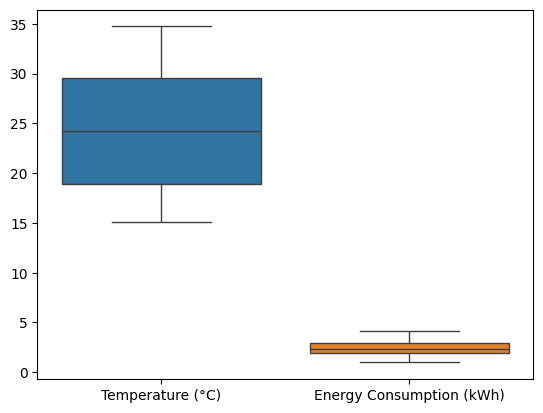

In [6]:
sns.boxplot(df)
plt.show()

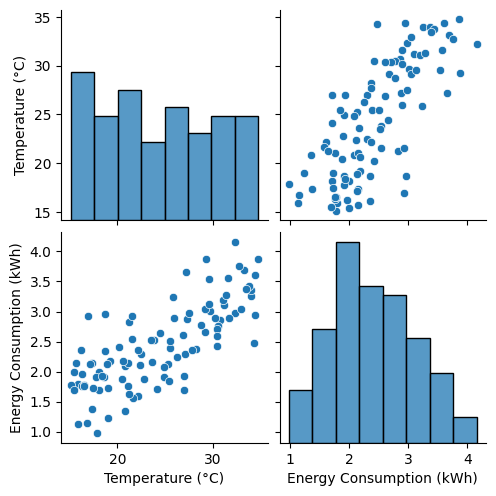

In [7]:
sns.pairplot(df)
plt.show()

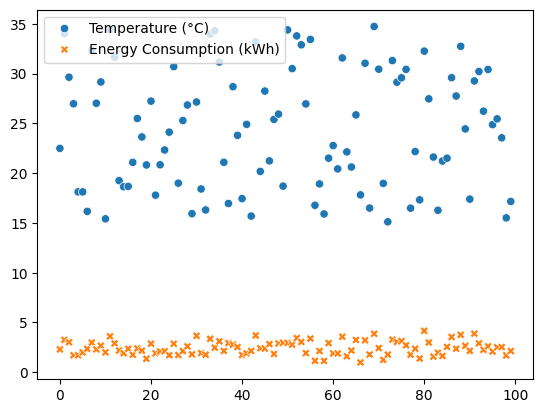

In [8]:
sns.scatterplot(df)
plt.show()

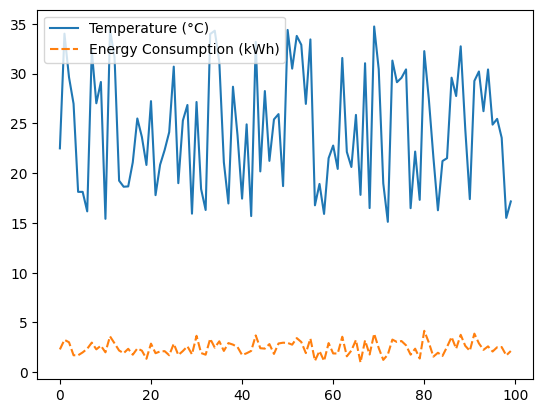

In [9]:
sns.lineplot(df)
plt.show()


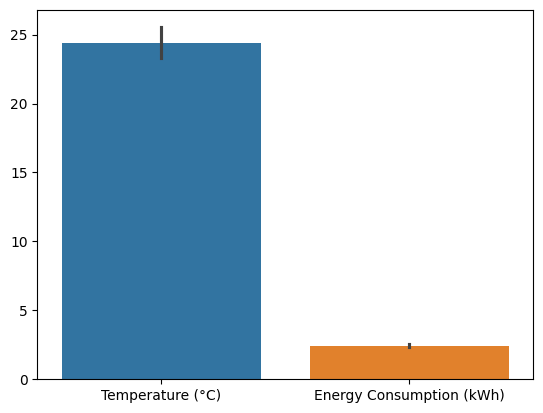

In [10]:
sns.barplot(df)
plt.show()


In [11]:
regression = linear_model.LinearRegression()


In [12]:
df_x = df[["Temperature (°C)"]]
df_y = df["Energy Consumption (kWh)"]


In [13]:
df_x


,Temperature (°C)
0,22.490802
1,34.014286
2,29.639879
3,26.973170
4,18.120373
...,...
95,24.875912
96,25.454657
97,23.550820
98,15.508383


In [14]:
df_y

0     2.292604
1     3.251925
2     3.009868
3     1.703533
4     1.702201
        ...   
95    2.079686
96    2.506915
97    2.525658
98    1.689184
99    2.129374
Name: Energy Consumption (kWh), Length: 100, dtype: float64

In [15]:
x_train , x_test , y_train , y_test = train_test_split(df_x , df_y , test_size = 0.33 , random_state = 42)


In [16]:
regression.fit(x_train , y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(regression.coef_)


[0.08760168]


In [18]:
y_pred = regression.predict(x_test)
print(y_pred)

[1.67555422 3.13196545 2.91719665 2.72495917 2.01758908 2.33535982
 2.0760451  3.07638407 1.60026258 2.22040473 2.32098004 2.62863686
 2.99291369 3.22667721 1.77373099 1.83754775 2.91548943 1.69392657
 3.02266534 1.86296185 3.1793525  3.1186244  1.91403303 1.62444769
 3.29325694 1.88552872 1.77801294 2.48004334 2.80476481 1.57387278
 3.26351252 2.47537451 2.13392996]


In [19]:
mean_squared_error(y_test , y_pred)


0.1648230246485146

In [20]:
r2_score(y_test , y_pred) * 100


66.17204881509863

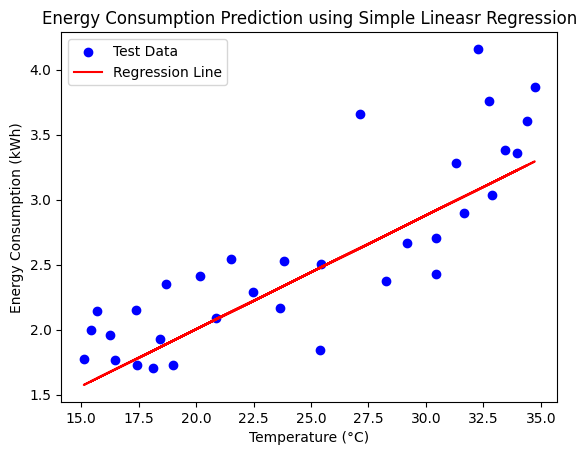

In [21]:
plt.scatter(x_test , y_test , color = "blue" , label = "Test Data")
plt.plot(x_test , y_pred , color = "red" , label = "Regression Line")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.title("Energy Consumption Prediction using Simple Lineasr Regression")
plt.show()


In [22]:
joblib.dump(regression , "Models/Linear_regression.pkl")


['Models/Linear_regression.pkl']

In [23]:
Model = joblib.load("Models/Linear_regression.pkl")


In [24]:
Model.predict([[30.45]])


array([2.91764382])

In [25]:
def prediction(x):
    x = float(x)
    prediction = Model.predict([[x]])
    print(f"For Tempreature {x} the Energy Consumption is {prediction[0]:.2f} kWh. ")


In [26]:
temp = input("Enter The Tempreature to Predict the Power Consumption: ")
prediction(temp)

Enter The Tempreature to Predict the Power Consumption:  71


For Tempreature 71.0 the Energy Consumption is 6.47 kWh. 
